### Self Organized Maps
#### Francisco Serradilla
#### Universidad Politécnica de Madrid

Self Organized Maps are a neural network used in unsupervised learning problems. They are another method to make clustering on data, but with one interesting property: they preserve topological distribution of the data in a bi-dimensional space.

How to use:

**create new SOM**

    som = SOM(N, M) # create a map with NxM units
    
  optional arguments:
    
  * metric=np.linalg.norm # metric for comparing distance between vectors; default is squared difference; other norms here: http://library.isr.ist.utl.pt/docs/numpy/reference/generated/numpy.linalg.norm.html
  * toroidal=False # use toroidal neighborhood
  * square=False # use square neighborhood instead of gaussian
    
**train SOM**

    som.train(samples, epoch) # train samples for a number of epochs, warning: initialize the weights to random values
    
  optional arguments:
  
  * alpha0=0.8 # init alpha value
  * sigmaf=0.1 # determines the final value for the neighborhood.
  * auto_stop=0.0001 # stop if quantization error decays below auto_stop value
  * trace=100 # print info each 'trace' epochs
  * verbose=1 # level of verbosity in traces
    
**visualize results**

    som.activation_map(samples) # get number of samples in each cluster
    som.prototypes() # get the prototypes of each cluster
    som.draw_map(samples, labels='auto', size=(800,600)) # draw map after processing all the samples
    som.draw_mesh(samples) # draw mesh of data with connectivity (only valid for inputs dim <= 2)
    som.summarize_distribution(X, Y) # return labels to pass to draw_map when supervised data
    
**use the SOM**

    som.predict(samples): # get the class for new data

Good intro to SOM: http://neupy.com/2017/12/09/sofm_applications.html  
Equations of SOM are in this post: https://tcosmo.github.io/2017/07/27/fun-with-som.html  
Scholarpedia: http://www.scholarpedia.org/article/Kohonen_network

In [1]:
from som import * # para python 3.12

help(SOM)

Help on class SOM in module som:

class SOM(builtins.object)
 |  SOM(N=0, M=0, metric=<function SOM.euclidean at 0x12007d4e0>, toroidal=False, square=False)
 |
 |  Methods defined here:
 |
 |  __init__(self, N=0, M=0, metric=<function SOM.euclidean at 0x12007d4e0>, toroidal=False, square=False)
 |      Class SOM:
 |      N, M: size of the competitive layer
 |      metric: SOM.euclidean (dafault), SOM.manhattan, SOM.nmin, SOM.nmax
 |      toroidal: use toroidal structure (default: False)
 |      square: use square neighborhood
 |
 |  activation_map(self, samples)
 |      Rdeturn the number of samples un each cluster
 |      samples: the samples to assign
 |
 |  cluster_distance(self)
 |
 |  describe(self)
 |      Describe a som
 |
 |  distance_map(self)
 |
 |  distribution(self, samples, labels=None)
 |      For each cluster, return list of the labels in that cluster
 |
 |  draw_imgs(self, size_i, size_j)
 |      Draw prototypes for the competitive map assuming that they are images with

ite: 100, mean_qe: 0.705; max_qe: 1.239; d: 0.063; alpha: 0.64; sigma: 1.51; lapse: 0.15
ite: 200, mean_qe: 0.575; max_qe: 0.994; d: 0.173; alpha: 0.49; sigma: 0.99; lapse: 0.12
ite: 300, mean_qe: 0.309; max_qe: 0.563; d: 0.416; alpha: 0.33; sigma: 0.61; lapse: 0.12
ite: 400, mean_qe: 0.028; max_qe: 0.042; d: 0.681; alpha: 0.18; sigma: 0.36; lapse: 0.12
ite: 480, mean_qe: 0.000; max_qe: 0.000; d: 0.707; alpha: 0.05; sigma: 0.23; lapse: 0.25
[0. 0.]  [1. 0.]  
[0. 1.]  [1. 1.]  
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]]


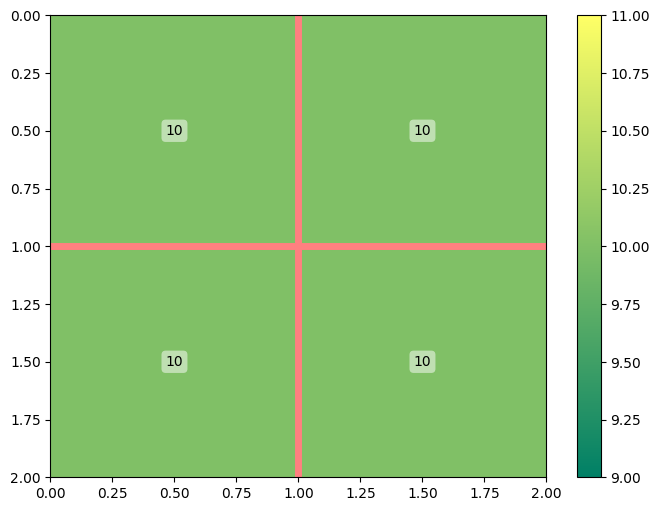

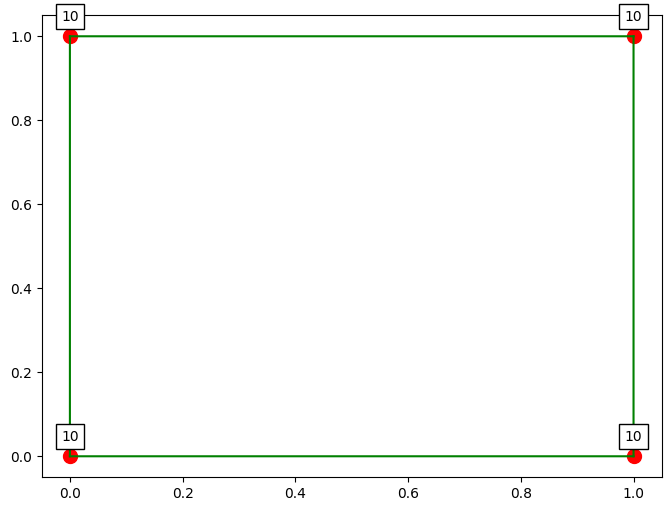

In [2]:
# a very simple example
#from som import *
import numpy as np

samples = [[0,0,0],[0,1,1],[1,0,2],[1,1,3]]*10
samples = np.array(samples)
np.random.shuffle(samples)

labels = samples[:,2]
samples = samples[:,:2]

som = SOM(2, 2)
som.train(samples, 500) # 0.989

#print(som.distance_map())
#print(som.activation_map(samples))
#print(som.prototypes())
som.draw_map(samples)
som.draw_mesh(samples)
print(som.distribution(samples, labels))

ite: 100, mean_qe: 0.835; max_qe: 1.087; d: 0.091; alpha: 0.64; sigma: 1.38; lapse: 0.14
ite: 200, mean_qe: 0.682; max_qe: 0.823; d: 0.193; alpha: 0.49; sigma: 0.80; lapse: 0.12
ite: 300, mean_qe: 0.113; max_qe: 0.232; d: 0.643; alpha: 0.33; sigma: 0.43; lapse: 0.12
ite: 400, mean_qe: 0.078; max_qe: 0.141; d: 0.711; alpha: 0.18; sigma: 0.21; lapse: 0.12
ite: 500, mean_qe: 0.074; max_qe: 0.124; d: 0.708; alpha: 0.02; sigma: 0.10; lapse: 0.12
ite: 500, mean_qe: 0.074; max_qe: 0.124; d: 0.708; alpha: 0.02; sigma: 0.10; lapse: 0.00
[-0.035  1.021]  [0.985 1.019]  
[0.03  0.024]  [1.017 0.017]  


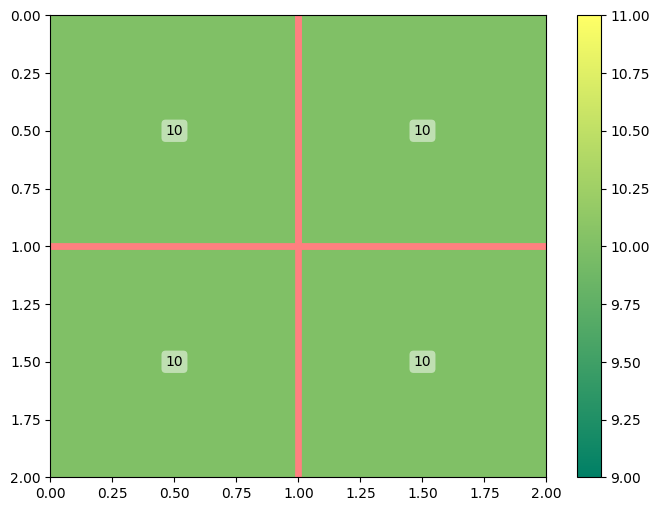

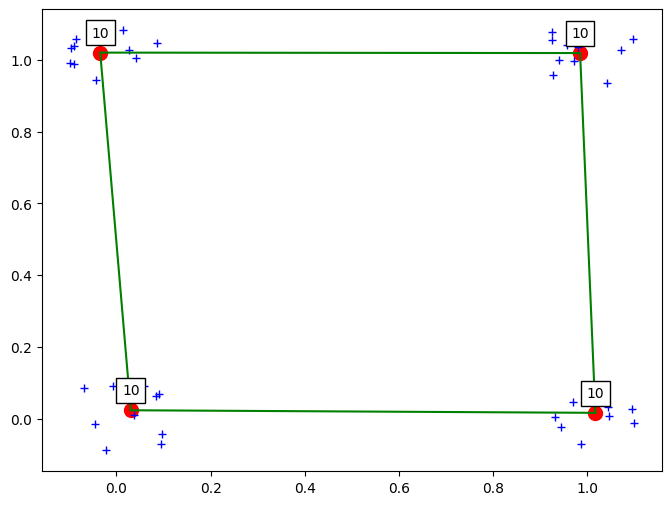

In [3]:
# add some noise
import random
samples = [[0,0,0],[0,1,1],[1,0,2],[1,1,3]]*10
samples = np.array([[x[0] + random.uniform(-0.1, 0.1), x[1] + random.uniform(-0.1, 0.1)] for x in samples])
#print(samples)

som = SOM(2, 2)
som.train(samples, 500, sigmaf=0.1)
som.draw_map(samples)
som.draw_mesh(samples, draw_samples=True)

ite: 100, mean_qe: 1.778; max_qe: 4.112; d: 0.388; alpha: 0.72; sigma: 4.26; lapse: 0.19
ite: 200, mean_qe: 1.593; max_qe: 3.197; d: 0.552; alpha: 0.64; sigma: 3.36; lapse: 0.17
ite: 300, mean_qe: 1.264; max_qe: 2.386; d: 0.809; alpha: 0.57; sigma: 2.55; lapse: 0.19
ite: 400, mean_qe: 0.895; max_qe: 1.697; d: 1.072; alpha: 0.49; sigma: 1.88; lapse: 0.17
ite: 500, mean_qe: 0.684; max_qe: 1.391; d: 1.303; alpha: 0.41; sigma: 1.35; lapse: 0.18
ite: 600, mean_qe: 0.466; max_qe: 0.816; d: 1.517; alpha: 0.33; sigma: 0.95; lapse: 0.18
ite: 700, mean_qe: 0.211; max_qe: 0.398; d: 1.710; alpha: 0.25; sigma: 0.66; lapse: 0.18
ite: 800, mean_qe: 0.061; max_qe: 0.123; d: 1.823; alpha: 0.18; sigma: 0.45; lapse: 0.18
ite: 900, mean_qe: 0.005; max_qe: 0.009; d: 1.870; alpha: 0.10; sigma: 0.30; lapse: 0.19
ite: 1000, mean_qe: 0.000; max_qe: 0.000; d: 1.874; alpha: 0.02; sigma: 0.20; lapse: 0.17
ite: 1000, mean_qe: 0.000; max_qe: 0.000; d: 1.874; alpha: 0.02; sigma: 0.20; lapse: 0.00
[0. 0.]  [0. 1.]  [

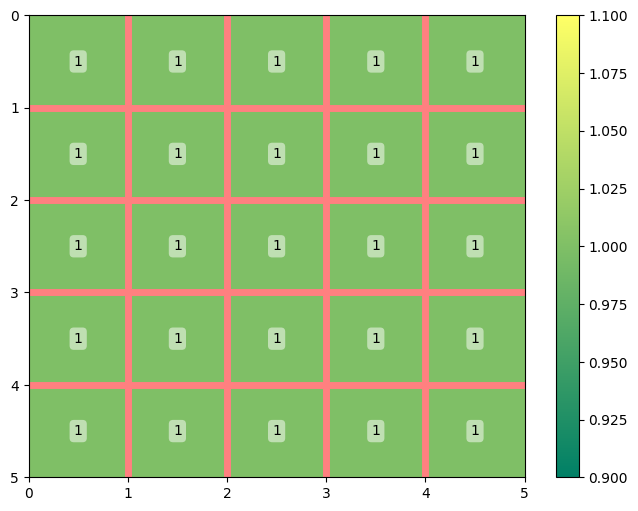

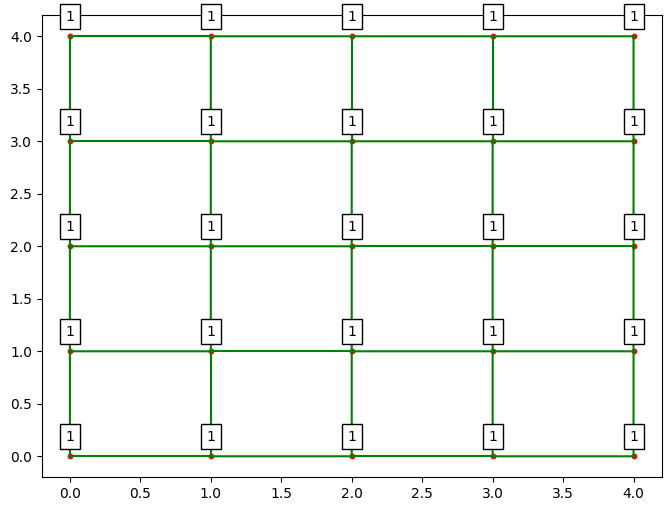

In [4]:
# simple square example

x = np.arange(0, 5, 1)
y = np.arange(0, 5, 1)
X,Y = np.meshgrid(x,y)
samples=np.array([X.flatten(),Y.flatten()]).T
np.random.shuffle(samples)

som = SOM(5, 5)
som.train(samples, 1000)    
som.distance_map()
som.draw_map(samples)

som.draw_mesh(samples)

ite: 100, mean_qe: 0.805; max_qe: 1.246; d: 0.118; alpha: 0.64; sigma: 2.15; lapse: 0.11
ite: 200, mean_qe: 0.735; max_qe: 1.206; d: 0.211; alpha: 0.49; sigma: 1.32; lapse: 0.09
ite: 300, mean_qe: 0.491; max_qe: 0.873; d: 0.366; alpha: 0.33; sigma: 0.74; lapse: 0.09
ite: 400, mean_qe: 0.070; max_qe: 0.121; d: 0.756; alpha: 0.18; sigma: 0.40; lapse: 0.09
ite: 485, mean_qe: 0.000; max_qe: 0.000; d: 0.816; alpha: 0.04; sigma: 0.22; lapse: 0.07
[0. 0. 1.]  [0. 1. 0.]  [1. 0. 0.]  


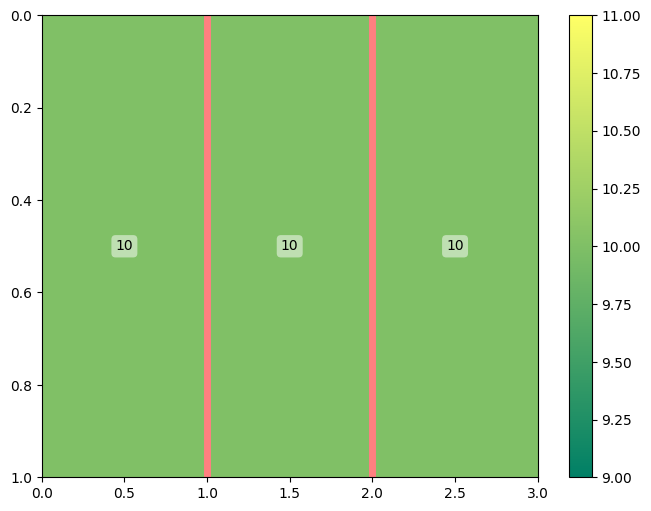

In [5]:
# another simple example

import numpy as np

samples = np.array([[1,0,0], [0,1,0], [0,0,1]]*10)
np.random.shuffle(samples)

som = SOM(1, 3)
som.train(samples, 500)
som.activation_map(samples)
som.distance_map()
som.draw_map(samples)

ite: 100, mean_qe: 0.286; max_qe: 0.828; d: 0.078; alpha: 0.64; sigma: 3.36; lapse: 0.69
ite: 200, mean_qe: 0.173; max_qe: 0.465; d: 0.156; alpha: 0.49; sigma: 1.88; lapse: 0.72
ite: 300, mean_qe: 0.091; max_qe: 0.310; d: 0.281; alpha: 0.33; sigma: 0.95; lapse: 0.72
ite: 400, mean_qe: 0.045; max_qe: 0.132; d: 0.329; alpha: 0.18; sigma: 0.45; lapse: 0.74
ite: 500, mean_qe: 0.034; max_qe: 0.076; d: 0.344; alpha: 0.02; sigma: 0.20; lapse: 0.74
ite: 500, mean_qe: 0.034; max_qe: 0.076; d: 0.344; alpha: 0.02; sigma: 0.20; lapse: 0.00
ite: 100, mean_qe: 0.222; max_qe: 0.578; d: 0.010; alpha: 0.64; sigma: 1.51; lapse: 0.32
ite: 200, mean_qe: 0.185; max_qe: 0.550; d: 0.028; alpha: 0.49; sigma: 0.99; lapse: 0.32
ite: 300, mean_qe: 0.116; max_qe: 0.315; d: 0.112; alpha: 0.33; sigma: 0.61; lapse: 0.32
ite: 400, mean_qe: 0.058; max_qe: 0.125; d: 0.200; alpha: 0.18; sigma: 0.36; lapse: 0.32
ite: 500, mean_qe: 0.055; max_qe: 0.122; d: 0.215; alpha: 0.02; sigma: 0.20; lapse: 0.32
ite: 500, mean_qe: 0.

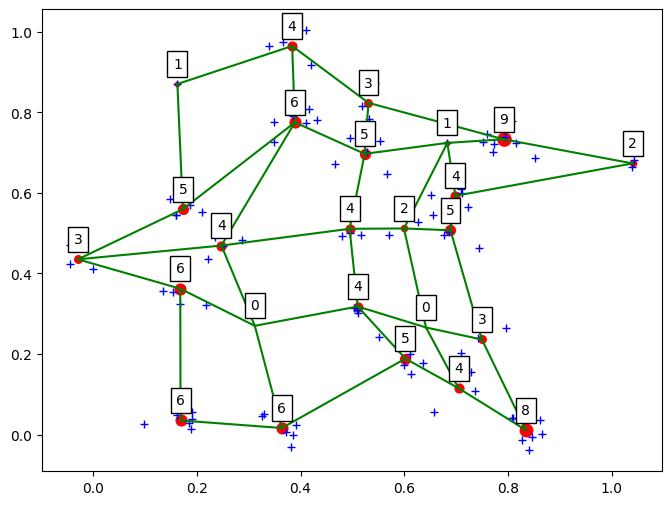

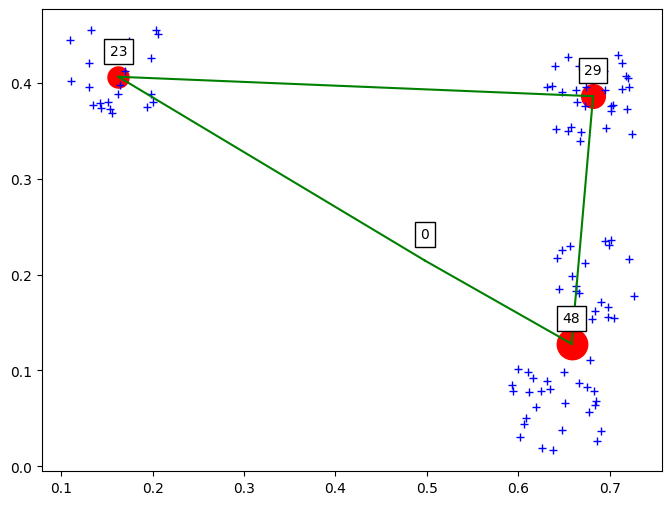

In [6]:
# data around N clusters

import random

def generate_clusters (N=2, size=100, noise=0.2, trace=False):
    # N = clusters; size = dataset size; noise = noise to add
    data = []
    centers = np.array([[random.random(), random.random()] for _ in range(N)]) # create random centers for clusters
    if trace:
        print(centers)
    for i in range(size):
        c = random.randint(0,N-1) # assign random cluster
        ns = np.array([noise*random.random()-noise/2, noise*random.random()-noise/2])
        data.append(centers[c]+ns)
    return np.array(data)

data = generate_clusters(25, 100, 0.1)
som = SOM(5, 5)
som.train(data, 500)
#som.draw_map(data)
som.draw_mesh(data, draw_samples=True)

data = generate_clusters(4, 100, 0.1)
som = SOM(2, 2)
som.train(data, 500)
#som.draw_map(data)
som.draw_mesh(data, draw_samples=True)

# interesting experiments: more clusters than neurons; more neurons than clusters...

[[0.60197167 0.12240985 0.23477315]
 [0.31513156 0.48852814 0.75270175]
 [0.61576031 0.89277799 0.08328735]
 [0.10549958 0.14026801 0.1454471 ]
 [0.61313215 0.37289737 0.99743399]
 [0.22755197 0.05219833 0.80272819]]
ite:  10, mean_qe: 0.607; max_qe: 0.845; d: 0.036; alpha: 0.72; sigma: 73.24; lapse: 1.06
ite:  20, mean_qe: 0.522; max_qe: 0.734; d: 0.084; alpha: 0.64; sigma: 46.44; lapse: 1.04
ite:  30, mean_qe: 0.339; max_qe: 0.558; d: 0.203; alpha: 0.57; sigma: 27.28; lapse: 1.10
ite:  40, mean_qe: 0.094; max_qe: 0.141; d: 0.342; alpha: 0.49; sigma: 15.13; lapse: 1.07
ite:  50, mean_qe: 0.002; max_qe: 0.002; d: 0.398; alpha: 0.41; sigma: 8.01; lapse: 1.07
ite:  56, mean_qe: 0.000; max_qe: 0.000; d: 0.402; alpha: 0.36; sigma: 5.37; lapse: 0.64


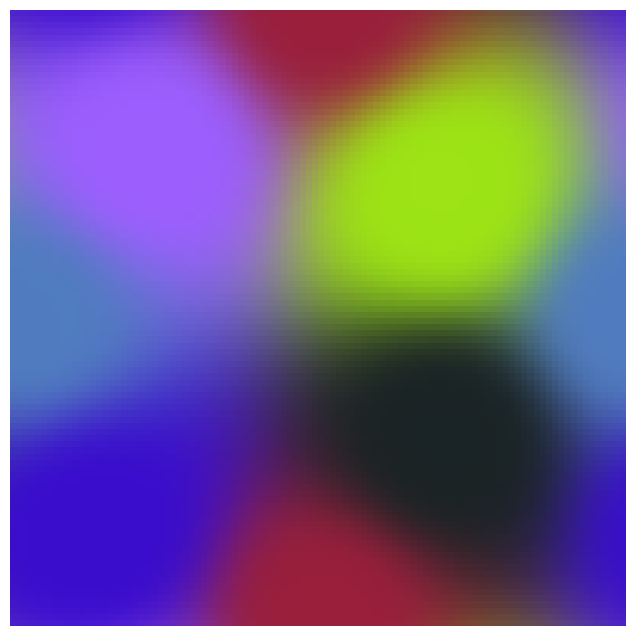

In [7]:
# a more interesting test: color map

ncolors = 6
import random
samples = np.array([[random.random() for _ in range(3)] for _ in range(ncolors)])
print(samples)

#samples = np.array([[1,0,0],[0,1,0],[0,0,1],[0,0,0],[1,1,1],[0.5,0.5,0.5]])

som = SOM(100, 100, toroidal=True, metric=SOM.euclidean)
som.train(samples, 100, trace=10)
#som.activation_map(samples)
#som.draw_map(samples, labels=None, textual=False)

# draw color grid
plt.figure(figsize = (12,8))
p = som.prototypes().reshape(som.N,som.M,3)
fig = plt.gcf()
plt.axis('off')
plt.imshow(p, interpolation='nearest')
plt.savefig("colors.png", bbox_inches='tight', pad_inches=0)

ite: 100, mean_qe: 0.306; max_qe: 0.783; d: 0.035; alpha: 0.64; sigma: 85.27; lapse: 3.89
ite: 200, mean_qe: 0.143; max_qe: 0.390; d: 0.249; alpha: 0.49; sigma: 24.52; lapse: 3.87
ite: 300, mean_qe: 0.055; max_qe: 0.175; d: 0.356; alpha: 0.33; sigma: 5.71; lapse: 3.86
ite: 400, mean_qe: 0.012; max_qe: 0.041; d: 0.368; alpha: 0.18; sigma: 1.14; lapse: 3.98
ite: 493, mean_qe: 0.000; max_qe: 0.001; d: 0.370; alpha: 0.03; sigma: 0.23; lapse: 3.57


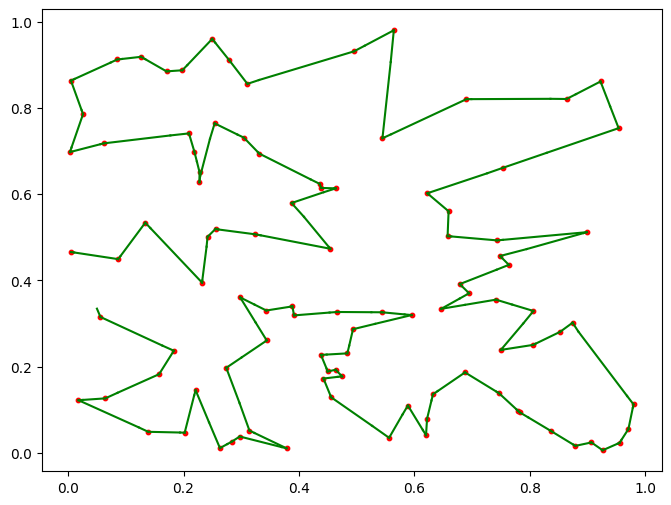

In [8]:
# a complex test: TSP problem

cities = np.array([[0.8744058793117488, 0.30207179832703746], [0.6901572276474558, 0.8203362566663311], [0.7793458478083026, 0.09728979746351918], [0.7483358474304422, 0.4563419482458657], [0.4556164527790729, 0.12863149772605698], [0.1837236688553453, 0.23773749495644914], [0.806151832654163, 0.3288366900529254], [0.6222702185205219, 0.6019431085670109], [0.21886861543988367, 0.6980104036528004], [0.9706096813038716, 0.054871876245520146], [0.13881496219356027, 0.048489530185603646], [0.08511086492841424, 0.9123075505436051], [0.45436952164297595, 0.4731540740573398], [0.8986352255038935, 0.5116579750591849], [0.9539248970461742, 0.7530784036308166], [0.6321102985156373, 0.13575967095580344], [0.31130918313591205, 0.8545457319320597], [0.025897479791937017, 0.7854526665590987], [0.31414095045738066, 0.051421702103483846], [0.2739561013272712, 0.1970964027924862], [0.22762328443470214, 0.627414210742153], [0.44920042912037383, 0.18835427573438068], [0.2793138301174244, 0.9103956650199608], [0.005128451667189338, 0.4655718085045638], [0.9222718335261915, 0.8613103704784812], [0.49352498279326595, 0.28652416807644077], [0.5560886356057152, 0.034564925228364185], [0.0048939219846825255, 0.8635350555457212], [0.7824462381771976, 0.09355415747424733], [0.2973635133076785, 0.037580527218207815], [0.659068210692151, 0.5602321147981546], [0.43549418718677035, 0.6241289474799954], [0.25580657871099755, 0.519726015381631], [0.5950780852425872, 0.3193476592023645], [0.15763623266223903, 0.18210618406479095], [0.3434173147566393, 0.32992255868483356], [0.06451313705472006, 0.12606114349173192], [0.23212286400737547, 0.3945559700824013], [0.955507285594692, 0.02296933408938162], [0.7459955912073274, 0.1385374827130177], [0.46365765315595475, 0.6132297411379687], [0.20196772698059162, 0.046358747430397584], [0.2980093518214506, 0.36041197123227897], [0.7533459401199348, 0.6610562232191091], [0.323433933838161, 0.5068337090138902], [0.062138830138457, 0.7177455044259695], [0.47467832142010535, 0.17692718986260936], [0.2415634321550142, 0.500852093941769], [0.3441878827094532, 0.2604351258948506], [0.5445252142594251, 0.7295590645635646], [0.25391391610860914, 0.7641244059389684], [0.2630560480211699, 0.010670642241309536], [0.2092202940037915, 0.7415775443241935], [0.0031474687633804566, 0.6974574785842637], [0.4952329615559806, 0.9311775894780175], [0.1978488658972426, 0.8872693649066419], [0.1705364411799497, 0.8846808176103278], [0.7634962513234275, 0.4358457309207533], [0.9259752834140167, 0.0056226911773098465], [0.22090405091557253, 0.14500040130773872], [0.4636205151855679, 0.19249574424477278], [0.8057632881682811, 0.250168118157608], [0.6785236695642043, 0.39119477830554505], [0.4837264739606879, 0.23045417711558214], [0.8786721718893166, 0.015853186240832207], [0.1263309724872509, 0.9185321014517236], [0.24969404380600335, 0.9600467657522086], [0.5886119367943214, 0.10948123668473264], [0.13373527735293878, 0.5336853876899833], [0.5642696742735989, 0.9801384844337597], [0.646401605512568, 0.3338636388089157], [0.05603526365085032, 0.3149530712641142], [0.387141492676661, 0.5792852545912592], [0.8634070619751958, 0.8206820685065667], [0.4662474858565825, 0.32647667516764145], [0.01801973379815025, 0.12175434785651695], [0.6218125565554127, 0.07860046445444713], [0.6573938922925594, 0.5023092428939168], [0.2837581848186974, 0.02576704782244421], [0.3044774374252185, 0.7310313422019327], [0.33131673439274434, 0.693896434962478], [0.8523694048117944, 0.2805224723356823], [0.6200019812032047, 0.03989814578273998], [0.5437394088109648, 0.3258031129949792], [0.4386079860370994, 0.6142798815693052], [0.7430581106897977, 0.49260737229959284], [0.3913628378102181, 0.3185830750836698], [0.9065498976196814, 0.02381958527497441], [0.6874236611131453, 0.18642068590773597], [0.6946411585627993, 0.36991609629423117], [0.3784063098306413, 0.01018756575849844], [0.43806374889930155, 0.2268325586117821], [0.7411632641820634, 0.35513151640087337], [0.3884706603234591, 0.34043302784114093], [0.08674110453583683, 0.4491174987265194], [0.9794883193315694, 0.11207520940235804], [0.7496156619797683, 0.23845386610980834], [0.4423888847621813, 0.17212722421686055], [0.2276570035864689, 0.6515924491551327], [0.836939257954547, 0.0499933914625984]]) # Length=8.587

nsom = 200 # 200 units for 100 cities

# create unidimensional map to force the network to create a route
som = SOM(1, nsom, toroidal=True) # use toroidal to force ciclic route
som.train(cities, 500)
som.activation_map(cities)

som.draw_mesh(cities, draw_number=False)

'Length=8.139'

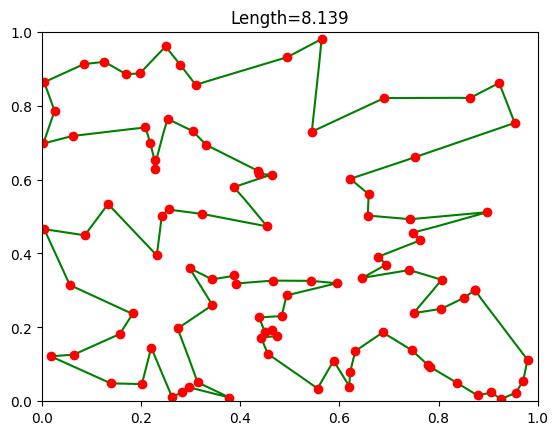

In [9]:
import matplotlib.pyplot as plt

plt.ion()
fig = plt.figure()
axes = fig.add_subplot(111)
xlim = axes.set_xlim(0.0,1.0)
ylim = axes.set_ylim(0.0,1.0)
x = []
y = []
l1, = axes.plot(x, y,'g')

def dist (x, y):
	return ( (x[0]-y[0])**2 + (x[1]-y[1])**2 ) ** 0.5

def globaldist (chromosome):
	acum = 0.0
	for i in range(len(chromosome)):
		acum += dist(cities[chromosome[i-1]],cities[chromosome[i]]) # -1 is the last element
	return acum

def paintcities (chromosome):
	res = []
	x = []
	y = []
	for g in chromosome:
		res.append(cities0[g])
		x.append(cities0[g][0])
		y.append(cities0[g][1])
	x.append(x[0])
	y.append(y[0])
	axes.plot(x, y,'ro')
	return res

def paintroute (chromosome):
	res = []
	x = []
	y = []
	for g in chromosome:
		res.append(cities[g])
		x.append(cities[g][0])
		y.append(cities[g][1])
	x.append(x[0])
	y.append(y[0])
	l1.set_data(x, y)
	return res

def phenotype (chromosome):
	paintroute(chromosome)
	s = 'Length=%5.3f' % globaldist(chromosome)
	plt.title(s)
	return s

cities0 = np.array([[0.8744058793117488, 0.30207179832703746], [0.6901572276474558, 0.8203362566663311], [0.7793458478083026, 0.09728979746351918], [0.7483358474304422, 0.4563419482458657], [0.4556164527790729, 0.12863149772605698], [0.1837236688553453, 0.23773749495644914], [0.806151832654163, 0.3288366900529254], [0.6222702185205219, 0.6019431085670109], [0.21886861543988367, 0.6980104036528004], [0.9706096813038716, 0.054871876245520146], [0.13881496219356027, 0.048489530185603646], [0.08511086492841424, 0.9123075505436051], [0.45436952164297595, 0.4731540740573398], [0.8986352255038935, 0.5116579750591849], [0.9539248970461742, 0.7530784036308166], [0.6321102985156373, 0.13575967095580344], [0.31130918313591205, 0.8545457319320597], [0.025897479791937017, 0.7854526665590987], [0.31414095045738066, 0.051421702103483846], [0.2739561013272712, 0.1970964027924862], [0.22762328443470214, 0.627414210742153], [0.44920042912037383, 0.18835427573438068], [0.2793138301174244, 0.9103956650199608], [0.005128451667189338, 0.4655718085045638], [0.9222718335261915, 0.8613103704784812], [0.49352498279326595, 0.28652416807644077], [0.5560886356057152, 0.034564925228364185], [0.0048939219846825255, 0.8635350555457212], [0.7824462381771976, 0.09355415747424733], [0.2973635133076785, 0.037580527218207815], [0.659068210692151, 0.5602321147981546], [0.43549418718677035, 0.6241289474799954], [0.25580657871099755, 0.519726015381631], [0.5950780852425872, 0.3193476592023645], [0.15763623266223903, 0.18210618406479095], [0.3434173147566393, 0.32992255868483356], [0.06451313705472006, 0.12606114349173192], [0.23212286400737547, 0.3945559700824013], [0.955507285594692, 0.02296933408938162], [0.7459955912073274, 0.1385374827130177], [0.46365765315595475, 0.6132297411379687], [0.20196772698059162, 0.046358747430397584], [0.2980093518214506, 0.36041197123227897], [0.7533459401199348, 0.6610562232191091], [0.323433933838161, 0.5068337090138902], [0.062138830138457, 0.7177455044259695], [0.47467832142010535, 0.17692718986260936], [0.2415634321550142, 0.500852093941769], [0.3441878827094532, 0.2604351258948506], [0.5445252142594251, 0.7295590645635646], [0.25391391610860914, 0.7641244059389684], [0.2630560480211699, 0.010670642241309536], [0.2092202940037915, 0.7415775443241935], [0.0031474687633804566, 0.6974574785842637], [0.4952329615559806, 0.9311775894780175], [0.1978488658972426, 0.8872693649066419], [0.1705364411799497, 0.8846808176103278], [0.7634962513234275, 0.4358457309207533], [0.9259752834140167, 0.0056226911773098465], [0.22090405091557253, 0.14500040130773872], [0.4636205151855679, 0.19249574424477278], [0.8057632881682811, 0.250168118157608], [0.6785236695642043, 0.39119477830554505], [0.4837264739606879, 0.23045417711558214], [0.8786721718893166, 0.015853186240832207], [0.1263309724872509, 0.9185321014517236], [0.24969404380600335, 0.9600467657522086], [0.5886119367943214, 0.10948123668473264], [0.13373527735293878, 0.5336853876899833], [0.5642696742735989, 0.9801384844337597], [0.646401605512568, 0.3338636388089157], [0.05603526365085032, 0.3149530712641142], [0.387141492676661, 0.5792852545912592], [0.8634070619751958, 0.8206820685065667], [0.4662474858565825, 0.32647667516764145], [0.01801973379815025, 0.12175434785651695], [0.6218125565554127, 0.07860046445444713], [0.6573938922925594, 0.5023092428939168], [0.2837581848186974, 0.02576704782244421], [0.3044774374252185, 0.7310313422019327], [0.33131673439274434, 0.693896434962478], [0.8523694048117944, 0.2805224723356823], [0.6200019812032047, 0.03989814578273998], [0.5437394088109648, 0.3258031129949792], [0.4386079860370994, 0.6142798815693052], [0.7430581106897977, 0.49260737229959284], [0.3913628378102181, 0.3185830750836698], [0.9065498976196814, 0.02381958527497441], [0.6874236611131453, 0.18642068590773597], [0.6946411585627993, 0.36991609629423117], [0.3784063098306413, 0.01018756575849844], [0.43806374889930155, 0.2268325586117821], [0.7411632641820634, 0.35513151640087337], [0.3884706603234591, 0.34043302784114093], [0.08674110453583683, 0.4491174987265194], [0.9794883193315694, 0.11207520940235804], [0.7496156619797683, 0.23845386610980834], [0.4423888847621813, 0.17212722421686055], [0.2276570035864689, 0.6515924491551327], [0.836939257954547, 0.0499933914625984]]) # Length=8.587
paintcities(range(100))
cities = som.prototypes()
phenotype(range(len(cities)))

ite:   1, mean_qe: 0.486; max_qe: 4.563; d: 0.212; alpha: 0.72; sigma: 4.26; lapse: 0.22
ite:   2, mean_qe: 0.440; max_qe: 4.533; d: 0.275; alpha: 0.64; sigma: 3.36; lapse: 0.22
ite:   3, mean_qe: 0.385; max_qe: 4.449; d: 0.376; alpha: 0.57; sigma: 2.55; lapse: 0.23
ite:   4, mean_qe: 0.345; max_qe: 4.349; d: 0.524; alpha: 0.49; sigma: 1.88; lapse: 0.23
ite:   5, mean_qe: 0.328; max_qe: 4.329; d: 0.777; alpha: 0.41; sigma: 1.35; lapse: 0.23
ite:   6, mean_qe: 0.341; max_qe: 4.335; d: 0.727; alpha: 0.33; sigma: 0.95; lapse: 0.23
ite:   7, mean_qe: 0.381; max_qe: 3.752; d: 0.986; alpha: 0.25; sigma: 0.66; lapse: 0.23
ite:   8, mean_qe: 0.427; max_qe: 2.848; d: 1.171; alpha: 0.18; sigma: 0.45; lapse: 0.23
ite:   9, mean_qe: 0.492; max_qe: 2.422; d: 1.283; alpha: 0.10; sigma: 0.30; lapse: 0.23
ite:  10, mean_qe: 0.585; max_qe: 2.389; d: 1.338; alpha: 0.02; sigma: 0.20; lapse: 0.41
ite:  10, mean_qe: 0.585; max_qe: 2.389; d: 1.338; alpha: 0.02; sigma: 0.20; lapse: 0.00


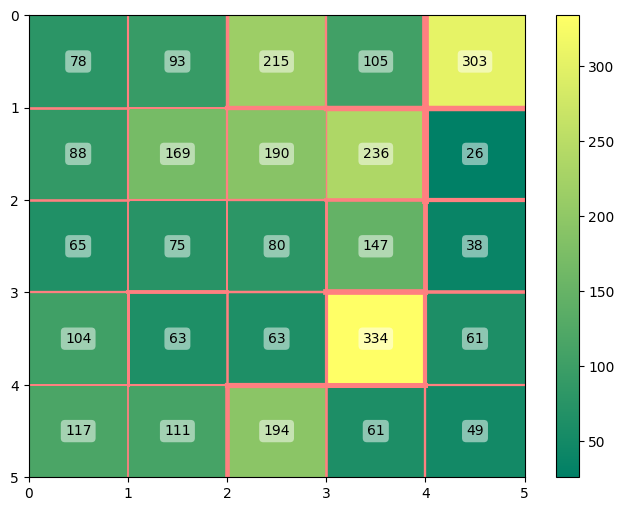

In [11]:
# load real stock data from many companies (normalized in [-1,1] range)
from som import *
import numpy as np


samples = np.loadtxt('stock.csv',dtype = 'float64')#,usecols = [0,1,2,3]) 14-1

labels = samples[:,14]
samples = samples[:,:14]

som = SOM(5,5)
som.train(samples, 10, trace=1, auto_stop=0.0) # quantization error very hight implies the som is very small
#som.distance_map()
#som.W = W
som.draw_map(samples, labels=None, textual=False)

d = som.distribution(samples, labels)

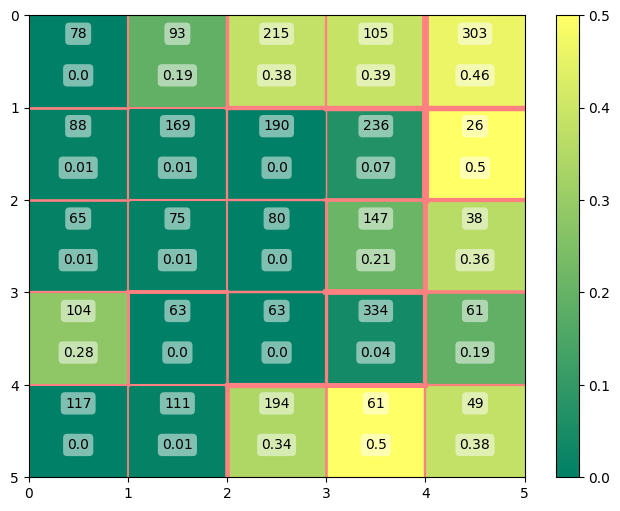

In [12]:
# set labels as the ratio of increasing stocks
labels = []
for i in range(som.N):
    for j in range(som.M):
        inc = 0
        l = d[i][j]
        for k in l:
            if k>0.5:
                inc += 1
        if len(l)==0:
            labels.append(0)
        else:
            labels.append(int(100*inc/len(l))/100)

labels = np.array(labels)
labels = labels.reshape((som.N,som.M))
som.draw_map(samples, labels=labels, textual=None, size=(800,600))  